In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow.keras.backend as be


ModuleNotFoundError: No module named 'numpy'

In [674]:
df = pd.read_csv("boston_corrected.csv")
train_set, test_set = train_test_split(df, test_size=0.1, random_state=26)


In [675]:
input_vars = ["LON", "LAT"]
output_vars = ['DIS', "RM", "TOWNNO","NOX",'PTRATIO', 'TAX', "INDUS","RAD", "AGE", "LSTAT", 'CMEDV']
all_batchsize = [150, 200, 200, 200, 200, 200, 200, 200, 200,400, 300]
INPUT_SCALER = StandardScaler()
INPUT_SCALER.fit(df[input_vars].values)

input_scalers = {"LAT": INPUT_SCALER}
current_vars =["LON", "LAT"] 
for output in output_vars:
    current_vars.append(output)
    INPUT_SCALER_n = StandardScaler()
    INPUT_SCALER_n.fit(df[current_vars].values)
    

    input_scalers[output] = INPUT_SCALER_n
    print("Input scaler: ", len(input_scalers), " is ", current_vars, " with key: ",output )


INPUT = INPUT_SCALER.transform(train_set[input_vars])
INPUT_TEST = INPUT_SCALER.transform(test_set[input_vars])

Input scaler:  2  is  ['LON', 'LAT', 'DIS']  with key:  DIS
Input scaler:  3  is  ['LON', 'LAT', 'DIS', 'RM']  with key:  RM
Input scaler:  4  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO']  with key:  TOWNNO
Input scaler:  5  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX']  with key:  NOX
Input scaler:  6  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO']  with key:  PTRATIO
Input scaler:  7  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX']  with key:  TAX
Input scaler:  8  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS']  with key:  INDUS
Input scaler:  9  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD']  with key:  RAD
Input scaler:  10  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'AGE']  with key:  AGE
Input scaler:  11  is  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'AGE', 'LSTAT']  with key:  LSTAT
Input scaler:  12  is  [

In [676]:
def QuadLoss():
    pass
def CreateModel(inSize):
    model = keras.models.Sequential()

    #model.add(keras.Input(shape=inSize))
    model.add(keras.layers.Dense(inSize))

    model.add(keras.layers.Dense(40, activation='relu'))

    model.add(keras.layers.Dense(40, activation='sigmoid'))
    #model.add(keras.layers.Dense(40, activation='sigmoid'))
    model.add(keras.layers.Dense(40, activation='relu'))
    #model.add(keras.layers.Dense(40, activation='selu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer="adam", metrics=["mean_squared_error"])

    return model

def TrainModel(model, input_vars, output_var, epochs, batch_size):
    
    #Scale and create our output data
    #OUT_SCALER = StandardScaler()
    #OUT_SCALER.fit(df[output_var])
    
    most_recent = input_vars[len(input_vars)-1]
    
    print(most_recent)
    
    OUTPUT = train_set[output_var].values#OUT_SCALER.transform(train_set[output_var])
    
    input_scaler = input_scalers[most_recent]
    
    ThisInput = input_scaler.transform(train_set[input_vars].values)
    
    model.fit(ThisInput, OUTPUT, epochs=epochs, batch_size=batch_size, verbose=0)
    
    InputTest = input_scaler.transform(test_set[input_vars])
    model_predict = model.predict(InputTest)
    
    #model_predict = OUT_SCALER.inverse_transform(model_predict_scaled)
    
    return model_predict

In [677]:
def TrainAndTest(input_vars, output_var, debug=True):
    model = CreateModel(len(input_vars))
    batch = all_batchsize[output_vars.index(output_var)]
    
    predict_vals = TrainModel(model,input_vars, output_var, batch, 10)[:,0]
    
    if(debug):
    
        plt.title(output_var)
        plt.plot(predict_vals, label="pred")
        plt.plot(test_set[output_var].values, label="true")

        diff = abs(predict_vals - test_set[output_var].values).T


        plt.plot(diff, label="diff")

        plt.legend()
        delta = np.sum(diff)/np.sum(test_set[output_var].values)
        print("Uncertainty was ", (delta*100), "% for variable ", output_var)


        plt.show()
    return model
    

LAT
Uncertainty was  5.5525794681768454 % for variable  DIS


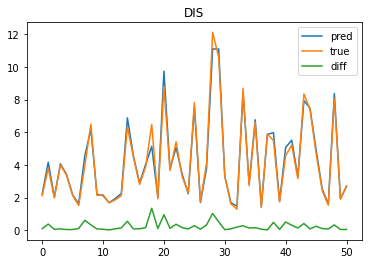

Model  0  has  2 vars:  ['LON', 'LAT']
DIS
Uncertainty was  7.247746841427266 % for variable  RM


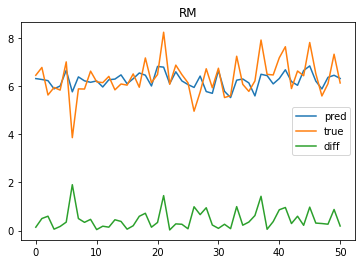

Model  1  has  3 vars:  ['LON', 'LAT', 'DIS']
RM
Uncertainty was  9.923025445619736 % for variable  TOWNNO


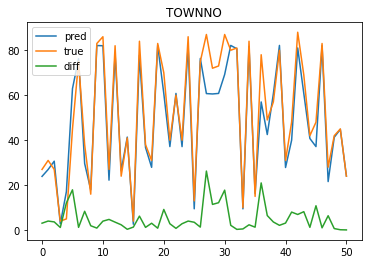

Model  2  has  4 vars:  ['LON', 'LAT', 'DIS', 'RM']
TOWNNO
Uncertainty was  4.248796549507853 % for variable  NOX


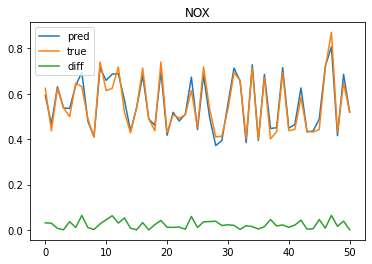

Model  3  has  5 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO']
NOX
Uncertainty was  4.41102103645208 % for variable  PTRATIO


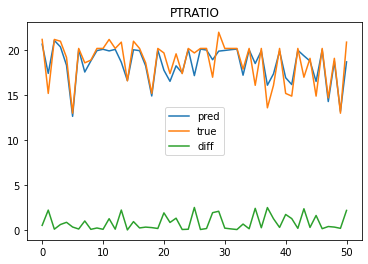

Model  4  has  6 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX']
PTRATIO
Uncertainty was  6.710105224487972 % for variable  TAX


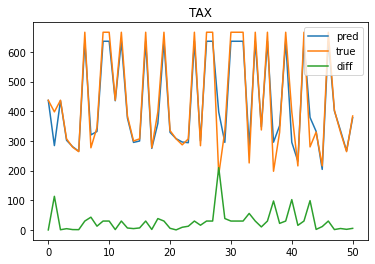

Model  5  has  7 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO']
TAX
Uncertainty was  4.310445424955477 % for variable  INDUS


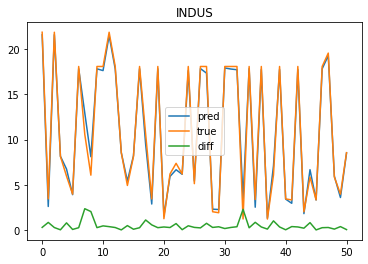

Model  6  has  8 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX']
INDUS
Uncertainty was  3.7334601632926776 % for variable  RAD


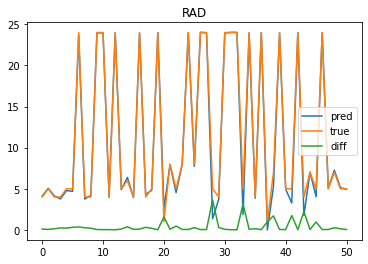

Model  7  has  9 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS']
RAD
Uncertainty was  14.241096661926333 % for variable  AGE


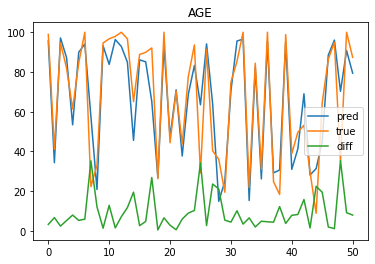

Model  8  has  10 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD']
AGE
Uncertainty was  20.581730400569366 % for variable  LSTAT


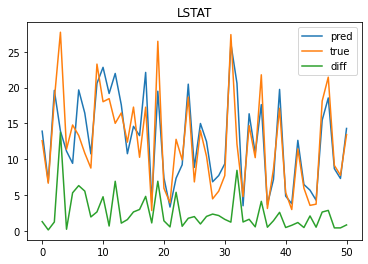

Model  9  has  11 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'AGE']
LSTAT
Uncertainty was  8.256629314451347 % for variable  CMEDV


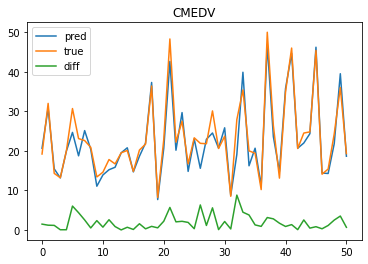

Model  10  has  12 vars:  ['LON', 'LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'AGE', 'LSTAT']


In [678]:
this_input_vars =  ["LON", "LAT"]

all_models = []


for i, var in enumerate(output_vars):
    all_models.append(TrainAndTest(this_input_vars, var))
    
    print("Model ", i , " has ", len(this_input_vars), "vars: ", this_input_vars)
    
    this_input_vars.append(var)

In [ ]:
print(np.sum(test_set["CMEDV"].values))

In [679]:
map = mpimg.imread('map.png')
minLon = min(df["LON"].values)
maxLon = max(df["LON"].values)
minLat = min(df["LAT"].values)
maxLat = max(df["LAT"].values)


def latLonToXY(lat, lon):
    
    lonScale = 2300
    dLon = 250
    latScale = 3200
    dLat = 280
    
    return (lon-minLon) * lonScale + dLon, map.shape[1] - ((lat-minLat) * latScale + dLat)


def XYToLat(x,y):
    #x = (lon-minLon) * lonScale + dLon
    #lon = (x - dLon)/lonScale + minLon
    #y = height - ((lon-minLon) * lonScale + dLon)
    #lon = (x - dLon)/lonScale + minLon
    lonScale = 2300
    dLon = 250
    latScale = 3200
    dLat = 280
    
    lon = (x - dLon)/lonScale + minLon
    lat = (map.shape[1]-y - dLat)/latScale + minLat
    return lon, lat

def CreateModelMask(model, scaler, gridSize=100, other_masks=None, maskCut=0):
    
    height = int(map.shape[0] / gridSize)
    width = int(map.shape[1] / gridSize)
   # result = np.zeros((height, width, 4))

    extra_vars_len = maskCut

    result = np.zeros((height, width))
    LONLAT = np.zeros((height*width, 2+extra_vars_len))
    
    
    j = 0
    for x in range(width):
        for y in range(height):
            
            vals = np.zeros(2 + extra_vars_len)
            lon,lat = XYToLat(x*gridSize,y*gridSize)
            vals[0] = lon
            vals[1] = lat
            
            for i in range(extra_vars_len):
                vals[i+2] = other_masks[y,x, i]
                #vals = 0,0,0
            
            LONLAT[j,:] =  vals
          #  print(x,y, " and", LONLAT[i])
            #print(j,LONLAT[j,:])
            j+=1
            #lon, lat = XYToLat(x,y)
            #val = model.predict(INPUT_SCALER.transform([[lon, lat]]))
            #print(val[0,0])
            #if(val > 5000):
            #result[y,x] = val
    

    
    scaled = scaler.transform(LONLAT)
    predict =  model.predict(scaled)
    #print(predict)
    i=0
    for x in range(width):
        for y in range(height):
            result[y,x] = predict[i]
            i+=1
            #print(result[y,x])
    #print(min(predict))
    #print(max(predict))
    return result
    


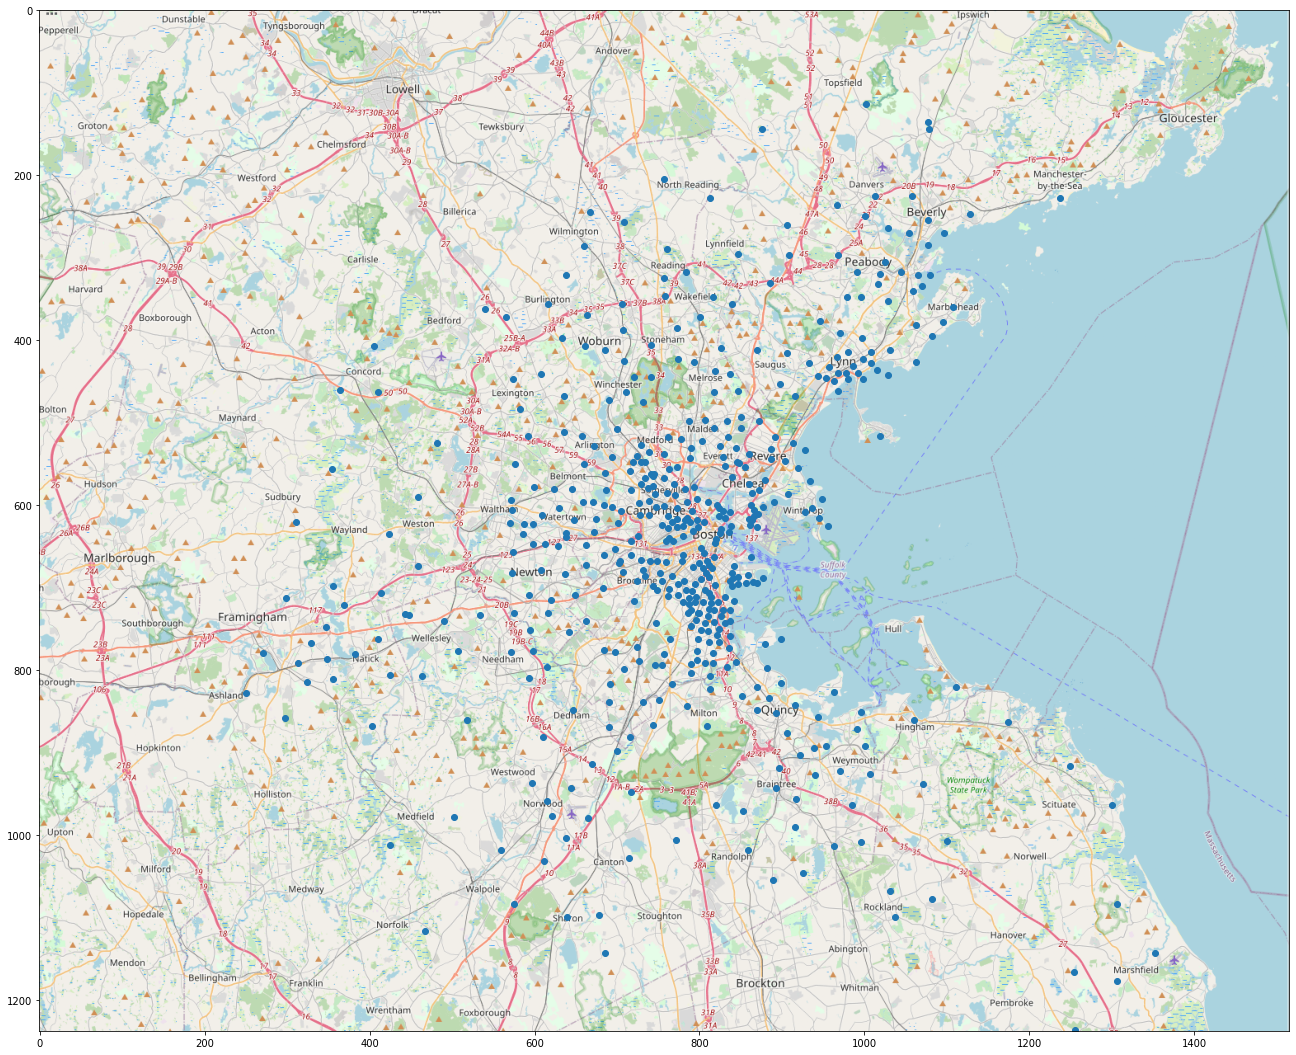

In [465]:
fig = plt.figure(figsize=(11.20 * 2, 15.11 * 2))
plt.imshow(map)
select = df.copy()

x,y = latLonToXY(select["LAT"].values, select["LON"].values)
plt.scatter(x,y)

#modelMask = CreateModelMask(model)


In [680]:


def CreateAllMasks(models, gridSize=20):
    
    height = int(map.shape[0] / gridSize)
    width = int(map.shape[1] / gridSize)
    
    each_mask = np.zeros((height, width, len(output_vars)))
    
    this_output = ["LAT"] + output_vars
    #this_outputappend(output_vars)
    
    print(this_output)
    #We iterate each variable, our model 'i' will predict
    for i,var in enumerate(this_output):
        if(i == len(this_output)-1):
            break

        #we get the model that tries to find the current var
        model = models[i]
        #get the current scaler
        scaler = input_scalers[var]
        cur_mask = CreateModelMask(models[i], scaler, gridSize, each_mask, i)
        each_mask[:,:,i] = cur_mask
    return each_mask
end_mask = CreateAllMasks(all_models)


['LAT', 'DIS', 'RM', 'TOWNNO', 'NOX', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'AGE', 'LSTAT', 'CMEDV']


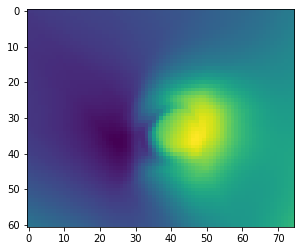

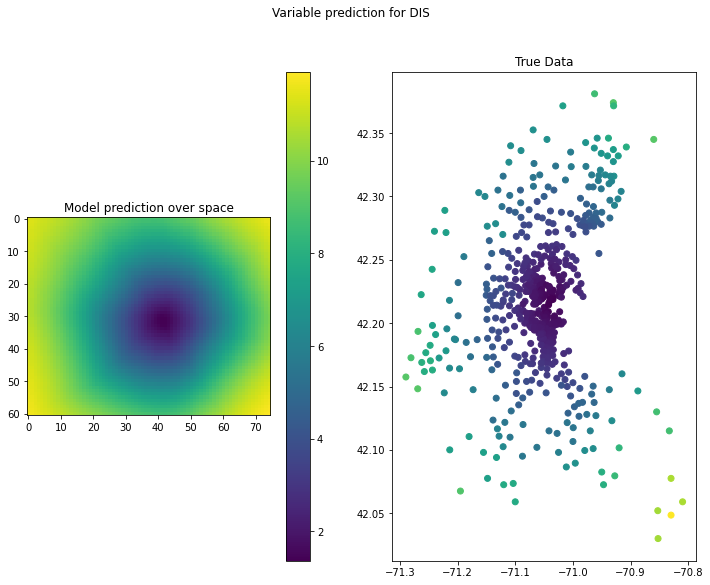

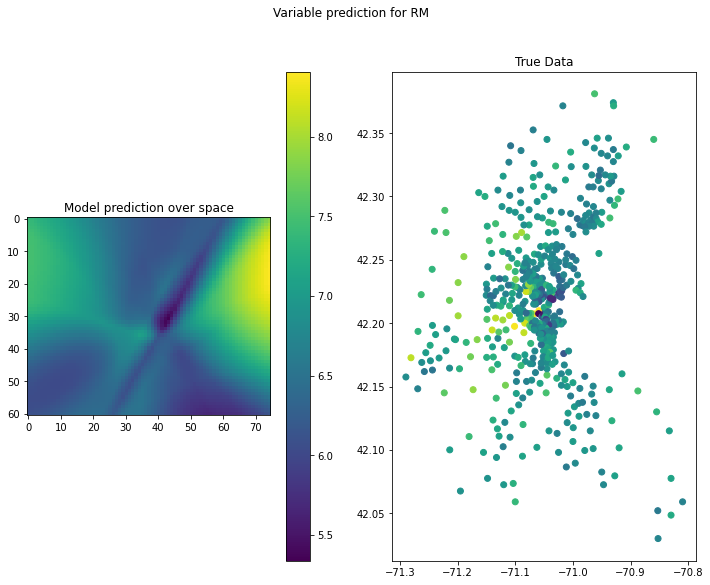

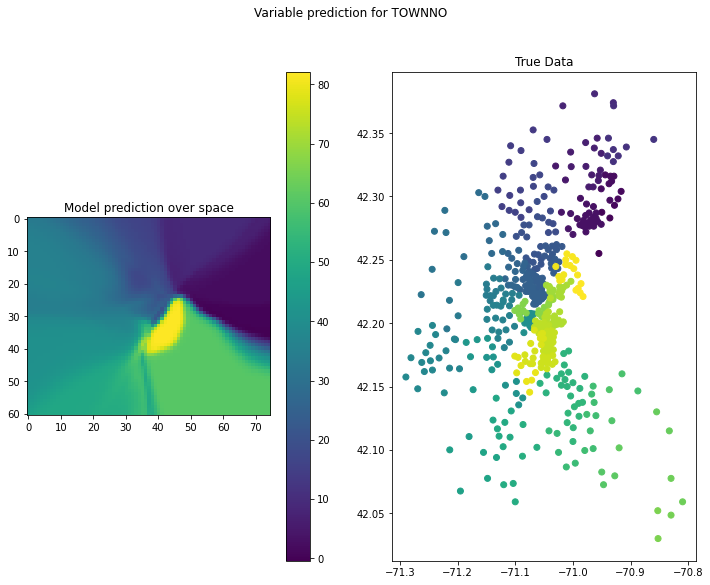

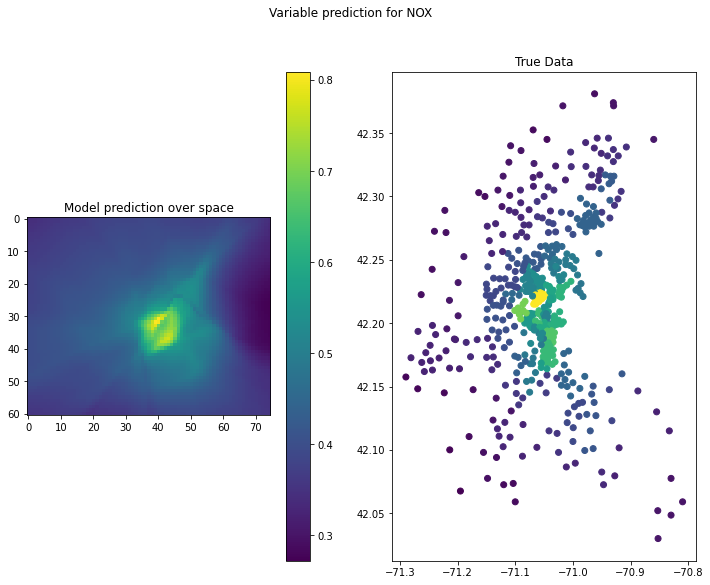

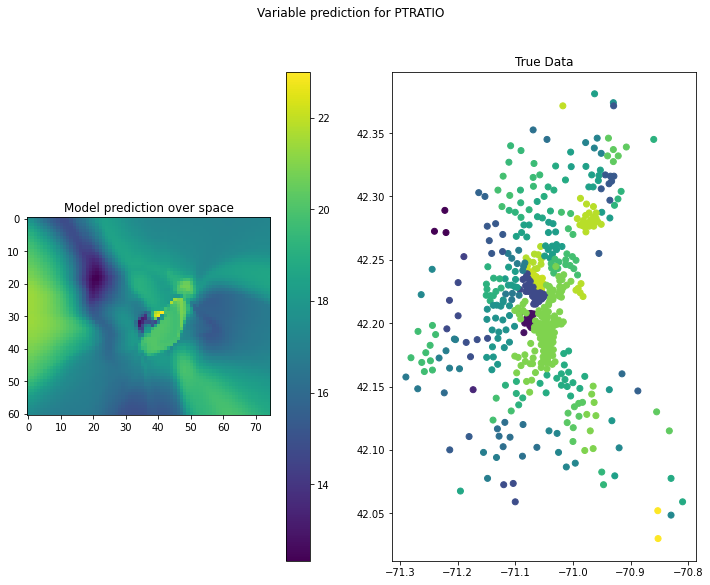

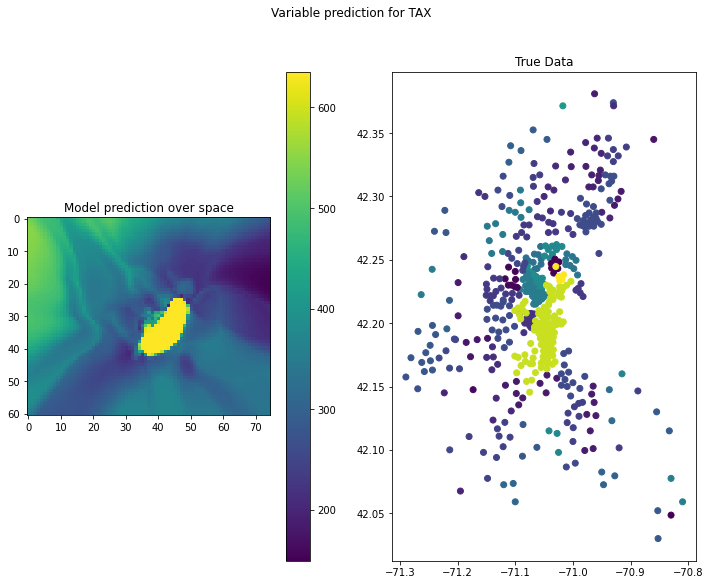

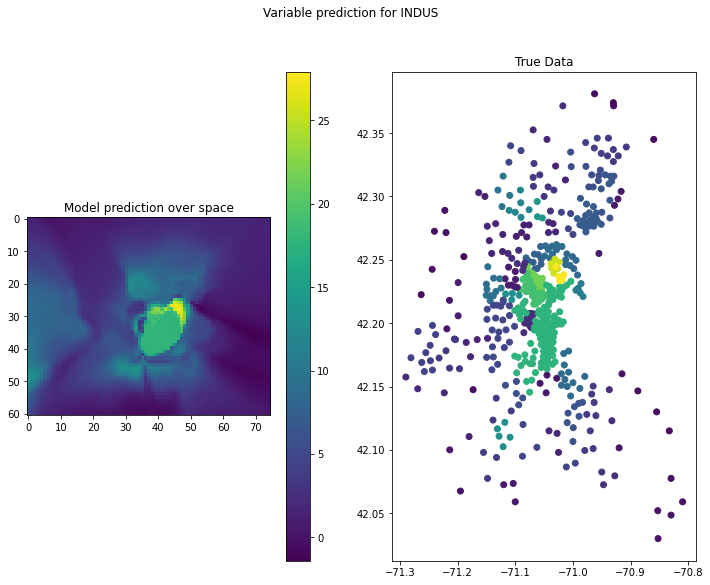

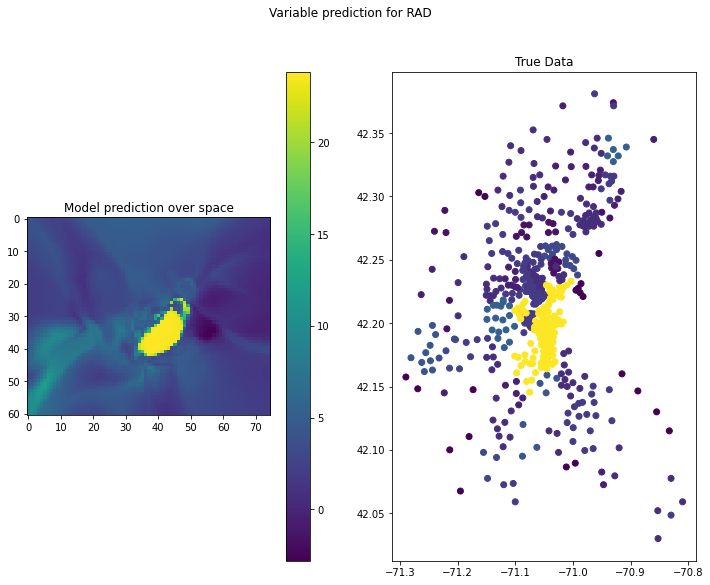

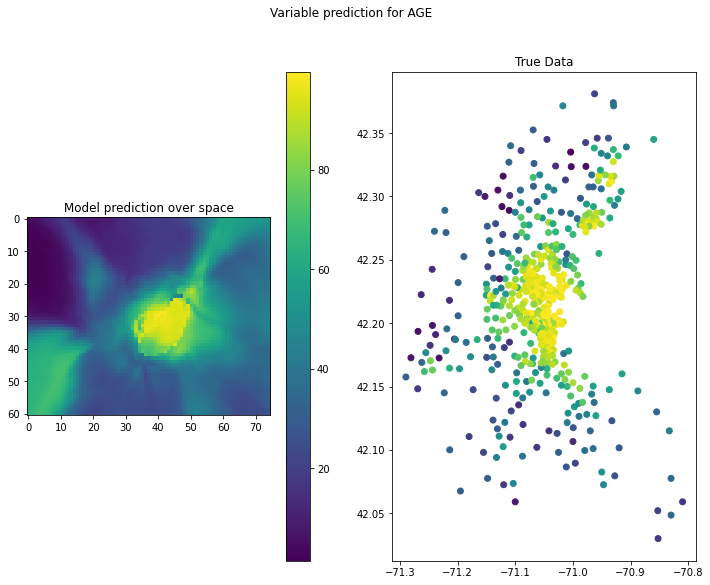

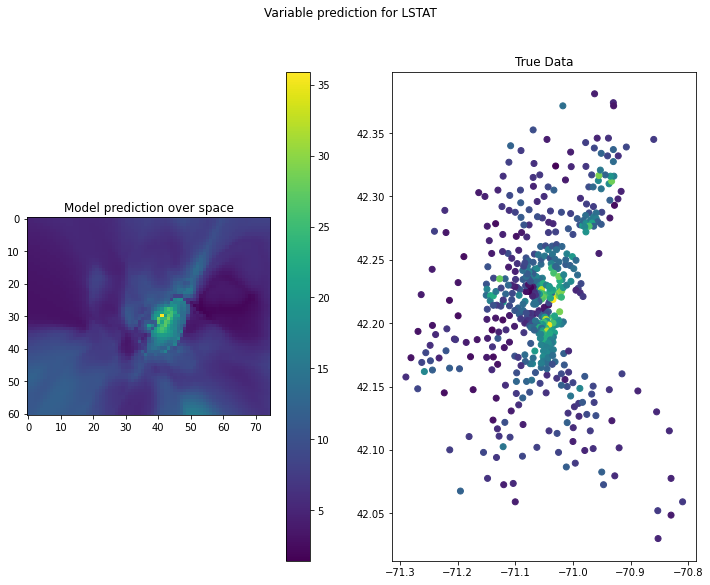

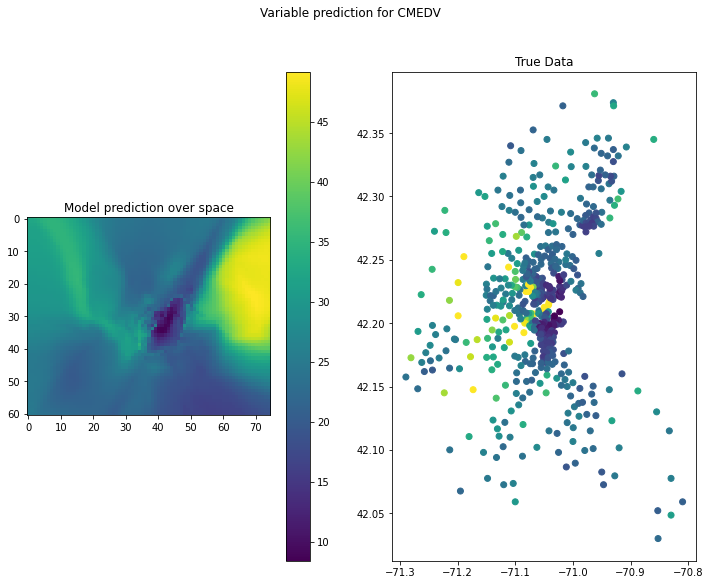

In [681]:

N = len(output_vars)
subX = int(np.sqrt(N))

#fig = plt.figure(figsize=(12,9))

for i in range(N):
    #ax = fig.add_subplots(N,N,i+1)
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(1,2,1)
    
    ax1.set_title("Model prediction over space")
    im = ax1.imshow(end_mask[:,:,i])
    fig.colorbar(im)
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(df["LON"].values, df["LAT"].values, c=df[output_vars[i]].values)
    ax2.set_title("True Data")

    fig.suptitle("Variable prediction for " + output_vars[i])
    plt.show()

In [1]:
def SaveModels():
    i = 0
    for model in all_models:
        model.save('./model'+str(i))
        i += 1

In [544]:
def GetValsFromLongLat(lon, lat):
    
    vals = [lon, lat]
    current_scale = ["LAT"] + output_vars
    results = {}
    
    for i, var in enumerate(output_vars):
        if(i == len(output_vars)-2):
            break
        #print(i)
        model = all_models[i]
        scaler = input_scalers[current_scale[i]]
        
        vals_2 = np.array(vals)
        #print("lol", vals_2)
        
        
        predict = model.predict(scaler.transform([vals_2]))[0,0]
        #print(var, " : ", predict)
        vals.append(predict)
        results[var] = predict
    return results

In [545]:
results = GetValsFromLongLat(-71, 42)

In [547]:
results['DIS']

9.995272